<a href="https://colab.research.google.com/github/riyasachdeva04/deep-learning-pytorch/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING PYTORCH

In [ ]:
import torch
import math
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy

Tensor basics

In [ ]:
x = torch.empty(1)

In [ ]:
print(x)

tensor([250482.7500])


In [ ]:
x = torch.empty(2, 3)

In [ ]:
x

tensor([[7.2572e+05, 4.5796e-41, 3.1146e+35],
        [4.5794e-41, 3.3052e+35, 4.5794e-41]])

In [ ]:
x = torch.empty(3, dtype = torch.int)
x

tensor([1642515552,      32681, 1642515552], dtype=torch.int32)

In [ ]:
x = torch.rand(4, 4)
x

tensor([[0.9689, 0.0900, 0.5659, 0.4802],
        [0.8603, 0.1240, 0.2108, 0.6110],
        [0.9223, 0.5294, 0.5365, 0.2348],
        [0.2802, 0.9506, 0.0549, 0.8028]])

In [ ]:
y = x.view(16)
y

tensor([0.9689, 0.0900, 0.5659, 0.4802, 0.8603, 0.1240, 0.2108, 0.6110, 0.9223,
        0.5294, 0.5365, 0.2348, 0.2802, 0.9506, 0.0549, 0.8028])

In [ ]:
y = x.view(8, 2)
print(y)

tensor([[0.9689, 0.0900],
        [0.5659, 0.4802],
        [0.8603, 0.1240],
        [0.2108, 0.6110],
        [0.9223, 0.5294],
        [0.5365, 0.2348],
        [0.2802, 0.9506],
        [0.0549, 0.8028]])


In [ ]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [ ]:
p = a.numpy()

In [ ]:
type(p)

numpy.ndarray

In [ ]:
p += 1
print(p)

[2. 2. 2. 2. 2.]


In [ ]:
a

tensor([2., 2., 2., 2., 2.])

both tensor and np array point to same memory location

In [ ]:
a = np.ones(5)
print(a)

[1. 1. 1. 1. 1.]


In [ ]:
b = torch.from_numpy(a)

In [ ]:
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
b.add_(1)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

In [ ]:
print(a)

[2. 2. 2. 2. 2.]


(you cannot convert a gpu tensor back to numpy, need to convert it back to cpu for that
)

In [ ]:
x = torch.ones(5, requires_grad = True)

requires_grad is initially set to fslse. set to true for variables which will be optimised later in the model


AUTOGRAD

In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-0.5225, -0.4643, -0.3752], requires_grad=True)


In [ ]:
y = x+2
print(y)

tensor([1.4775, 1.5357, 1.6248], grad_fn=<AddBackward0>)


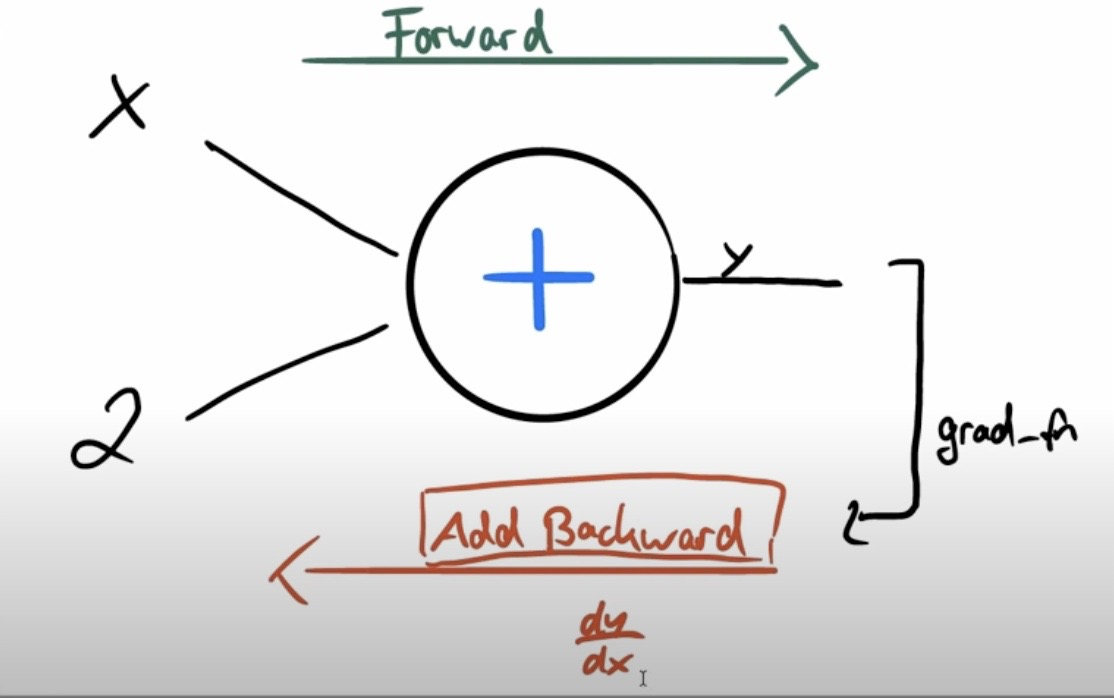

In [ ]:
z = y*y*2;
print(z)
type(z)
z = z.mean()
print(z)
z.backward()
print(x.grad)

tensor([4.3660, 4.7165, 5.2799], grad_fn=<MulBackward0>)
tensor(4.7875, grad_fn=<MeanBackward0>)
tensor([1.9700, 2.0475, 2.1664])


backward works without argument only on scalar tensors(single element tensor) (won't work on y, but will work on z)





In [ ]:
v = torch.tensor([0.1, 0.5, 0.7])

In [ ]:
y.backward(v)

In [ ]:
print(x.grad)

tensor([2.0700, 2.5475, 2.8664])


In [ ]:
x.requires_grad_(False)

tensor([-0.5225, -0.4643, -0.3752])

In [ ]:
y = x.detach()

In [ ]:
with torch.no_grad():
  y = x+2
  print(y)

tensor([1.4775, 1.5357, 1.6248])


In [ ]:
print(x)

tensor([-0.5225, -0.4643, -0.3752])


In [ ]:
weights = torch.ones(4, requires_grad = True)

In [ ]:
for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)



tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


but you need to set weights back to zero during training for each epoch/iteration


In [ ]:
  for epoch in range(3):
    model_output = (weights*3).sum()

    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()

tensor([12., 12., 12., 12.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
optimizer = torch.optim.ASGD([weights], lr = 0.01)
optimizer.step()
optimizer.zero_grad()


difference between SGD and ASGD : ASGD's learning rate decays to convergence over time


BACKPROPAGATION

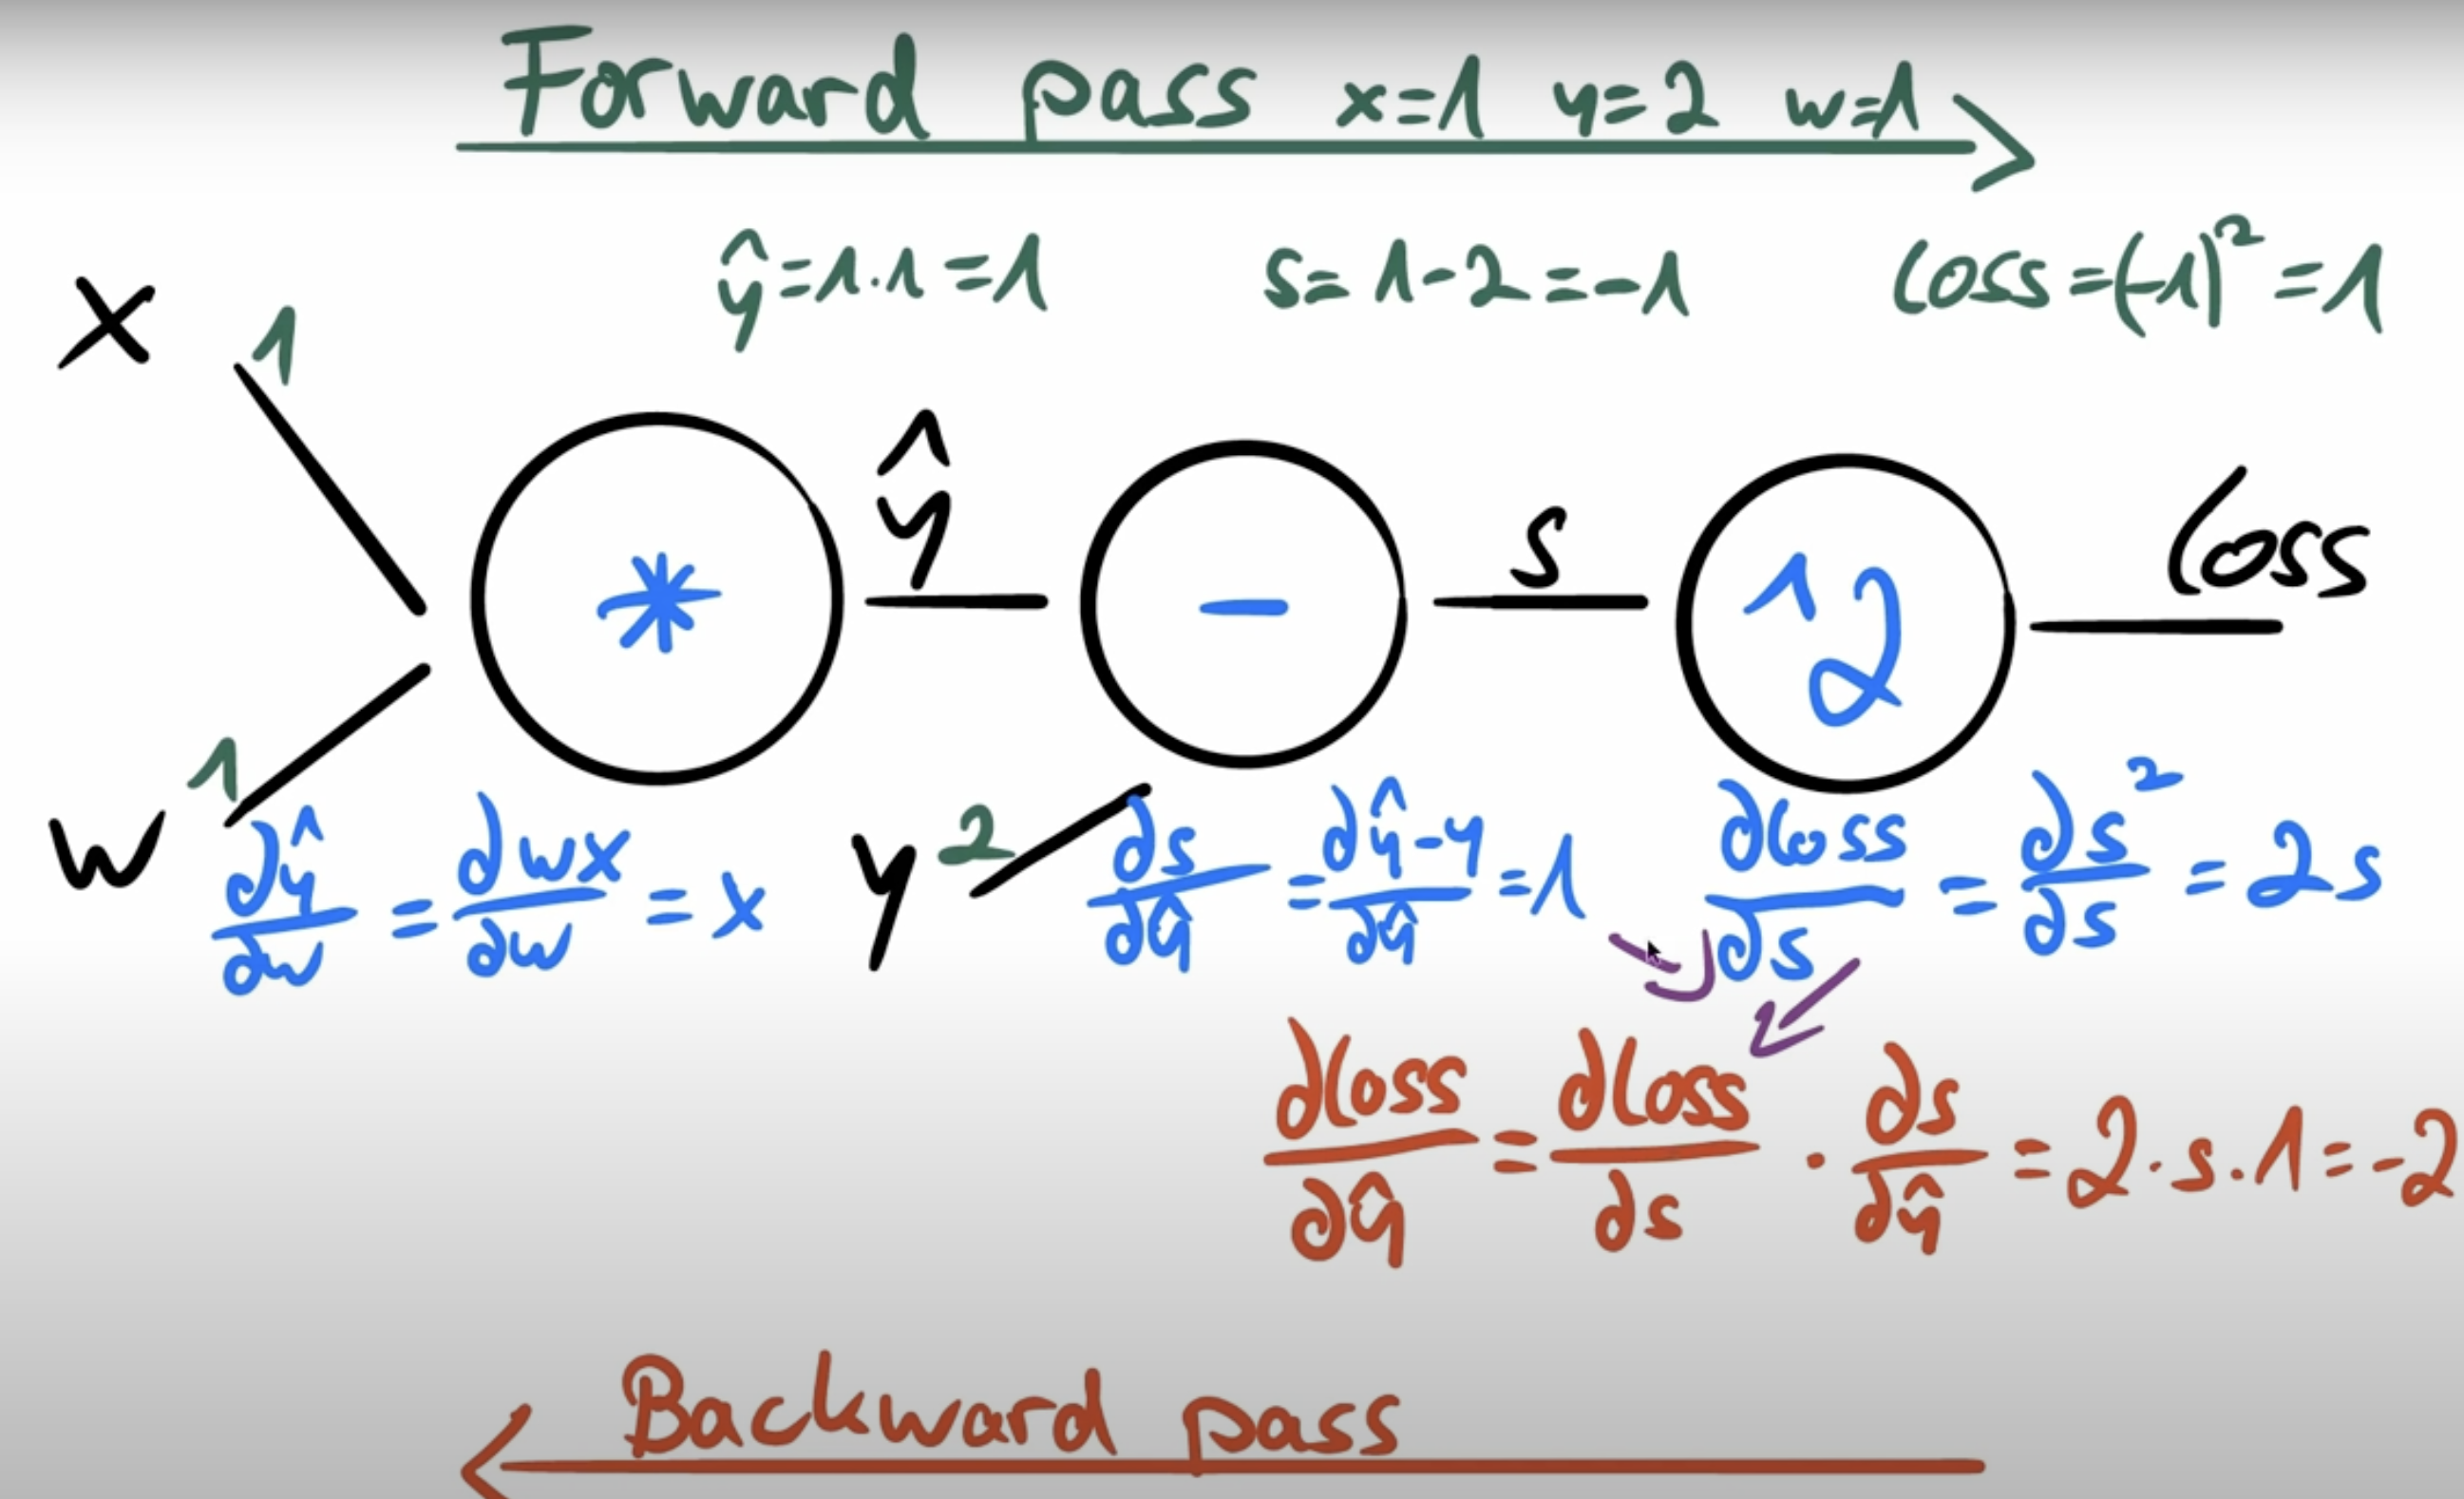

In [ ]:
x = torch.tensor([1.0])

In [ ]:
y = torch.tensor(2.0)

In [ ]:
w = torch.tensor(1.0, requires_grad = True)

In [ ]:
y_hat = w*x

In [ ]:
loss = (y_hat - y) ** 2

In [ ]:
print(loss)

tensor([1.], grad_fn=<PowBackward0>)


In [ ]:
loss.backward()

In [ ]:
w.grad

tensor(-2.)

GRADIENT DESCENT

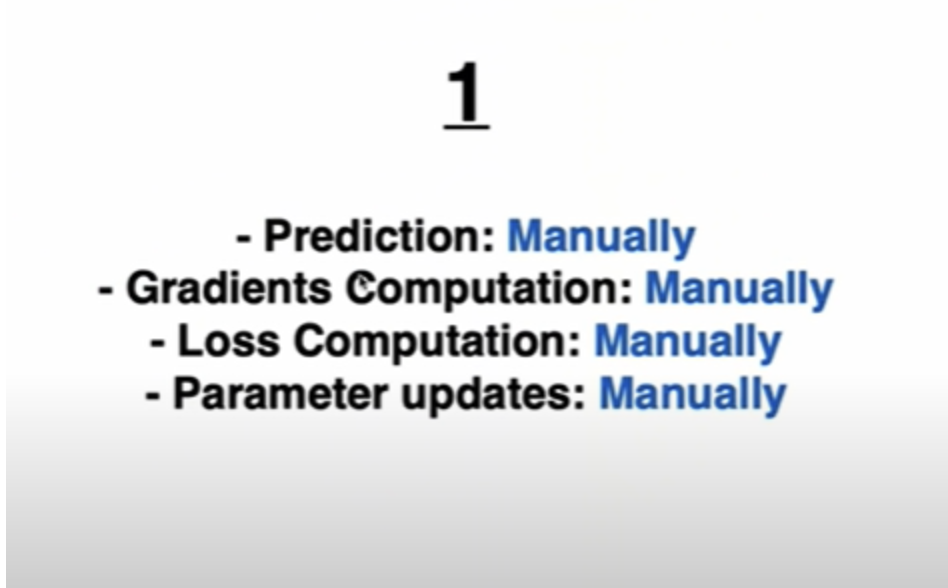

In [ ]:
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)
w = 0.0

#model prediction
def forward(x):
  return w*x

def loss(y, y_predicted):
  loss =((y_predicted - y)**2).mean()
  return loss

def gradient(x, y, y_predicted):
  return (np.dot(2*x, y_predicted - y)).mean()


print(f'prediction before training f(5): {forward(5)}')

#Traning 
learning_rate = 0.01
niters = 10

for epoch in range(niters):
  #pred
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients
  dw = gradient(X, Y, y_pred)
  

  #update weights
  w -= learning_rate * dw

  print(f'epoch {epoch+1}: w:{w:.3f}, loss:{l:.8f}')

  print(f'prediction after training f(5): {forward(5)}')

prediction before training f(5): 0.0
epoch 1: w:1.200, loss:30.00000000
prediction after training f(5): 6.0
epoch 2: w:1.680, loss:4.79999924
prediction after training f(5): 8.399999809265136
epoch 3: w:1.872, loss:0.76800019
prediction after training f(5): 9.35999994277954
epoch 4: w:1.949, loss:0.12288000
prediction after training f(5): 9.743999934196472
epoch 5: w:1.980, loss:0.01966083
prediction after training f(5): 9.897600066661834
epoch 6: w:1.992, loss:0.00314574
prediction after training f(5): 9.95904014110565
epoch 7: w:1.997, loss:0.00050331
prediction after training f(5): 9.983615934848784
epoch 8: w:1.999, loss:0.00008053
prediction after training f(5): 9.993446409702301
epoch 9: w:1.999, loss:0.00001288
prediction after training f(5): 9.997378492355345
epoch 10: w:2.000, loss:0.00000206
prediction after training f(5): 9.998951268196105


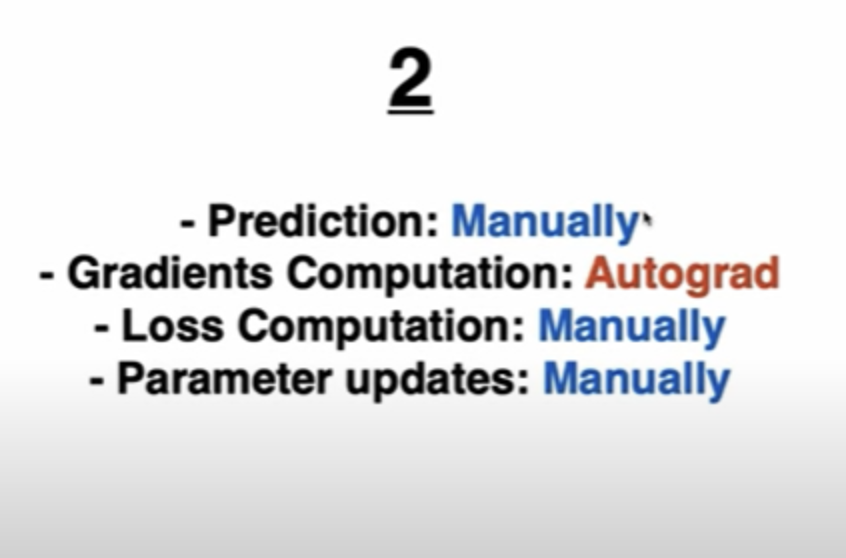

In [ ]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#model prediction
def forward(x):
  return w*x

def loss(y, y_predicted):
  loss =((y_predicted - y)**2).mean()
  return loss



print(f'prediction before training f(5): {forward(5)}')

#Traning 
learning_rate = 0.01
niters = 100

for epoch in range(niters):
  #pred
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients
  l.backward()
  

  #update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  w.grad.zero_()

  if epoch % 10 ==0:
    print(f'epoch {epoch+1}: w:{w:.3f}, loss:{l:.8f}')

print(f'prediction after training f(5): {forward(5)}')

prediction before training f(5): 0.0
epoch 1: w:0.300, loss:30.00000000
epoch 11: w:1.665, loss:1.16278565
epoch 21: w:1.934, loss:0.04506890
epoch 31: w:1.987, loss:0.00174685
epoch 41: w:1.997, loss:0.00006770
epoch 51: w:1.999, loss:0.00000262
epoch 61: w:2.000, loss:0.00000010
epoch 71: w:2.000, loss:0.00000000
epoch 81: w:2.000, loss:0.00000000
epoch 91: w:2.000, loss:0.00000000
prediction after training f(5): 9.999998092651367


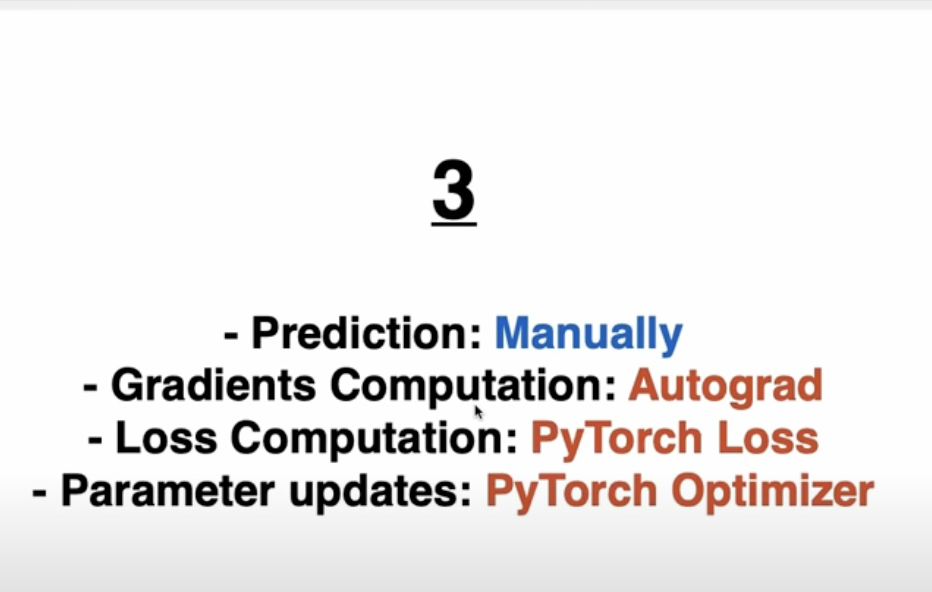

In [ ]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#model prediction
def forward(x):
  return w*x


print(f'prediction before training f(5): {forward(5):.3f}')

#Traning 
learning_rate = 0.01
niters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)

for epoch in range(niters):
  #pred
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients
  l.backward() #dl/dw
  

  #update weights
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if epoch % 10 ==0:
    print(f'epoch {epoch+1}: w:{w:.3f}, loss:{l:.8f}')

print(f'prediction after training f(5): {forward(5):.3f}')

prediction before training f(5): 0.000
epoch 1: w:0.300, loss:30.00000000
epoch 11: w:1.665, loss:1.16278565
epoch 21: w:1.934, loss:0.04506890
epoch 31: w:1.987, loss:0.00174685
epoch 41: w:1.997, loss:0.00006770
epoch 51: w:1.999, loss:0.00000262
epoch 61: w:2.000, loss:0.00000010
epoch 71: w:2.000, loss:0.00000000
epoch 81: w:2.000, loss:0.00000000
epoch 91: w:2.000, loss:0.00000000
prediction after training f(5): 10.000


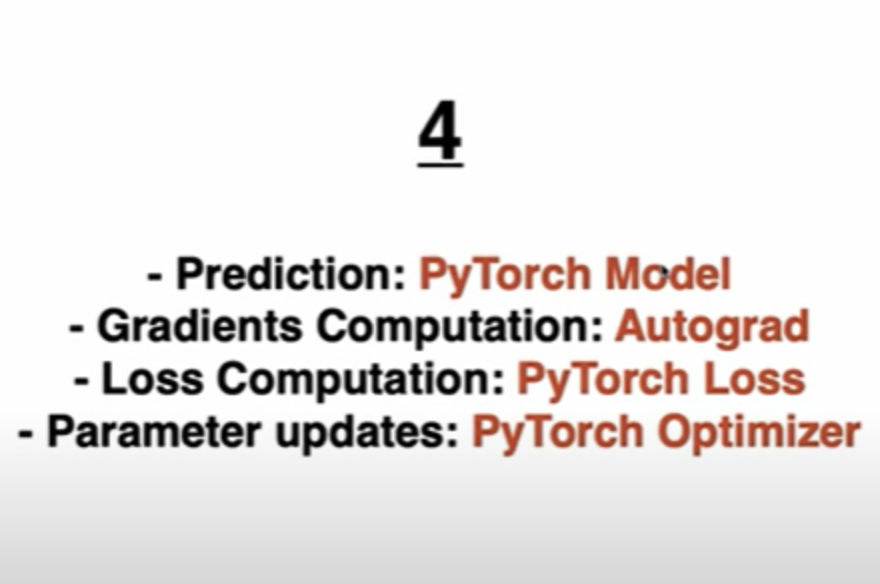

In [ ]:
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)


input_size = n_features
output_size = n_features
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  def __init__(self,input_dim, output_dim):
    super(LinearRegression,self).__init__()
    #define layers
    self.lin= nn.Linear(input_dim,output_dim)

  def forward(self,x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'prediction before training f(5): {model(X_test).item():.3f}')

#Traning 
learning_rate = 0.01
niters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(niters):
  #pred
  y_pred = model(X)

  #loss
  l = loss(Y, y_pred)

  #gradients
  l.backward() #dl/dw
  

  #update weights
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if epoch % 10 ==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w:{w[0][0].item():.3f}, loss:{l:.8f}')

print(f'prediction after training f(5): {model(X_test).item():.3f}')

4 1
prediction before training f(5): 3.689
epoch 1: w:1.015, loss:13.00480270
epoch 11: w:1.841, loss:0.33646643
epoch 21: w:1.974, loss:0.00870647
epoch 31: w:1.995, loss:0.00022648
epoch 41: w:1.998, loss:0.00000701
epoch 51: w:1.999, loss:0.00000126
epoch 61: w:1.999, loss:0.00000105
epoch 71: w:1.999, loss:0.00000099
epoch 81: w:1.999, loss:0.00000093
epoch 91: w:1.999, loss:0.00000087
prediction after training f(5): 9.998


LINEAR REGRESSION

epoch: 1: loss = 5791.8276
epoch: 11: loss = 4288.8867
epoch: 21: loss = 3202.4309
epoch: 31: loss = 2416.1565
epoch: 41: loss = 1846.5264
epoch: 51: loss = 1433.4464
epoch: 61: loss = 1133.6227
epoch: 71: loss = 915.8222
epoch: 81: loss = 757.4846
epoch: 91: loss = 642.2946


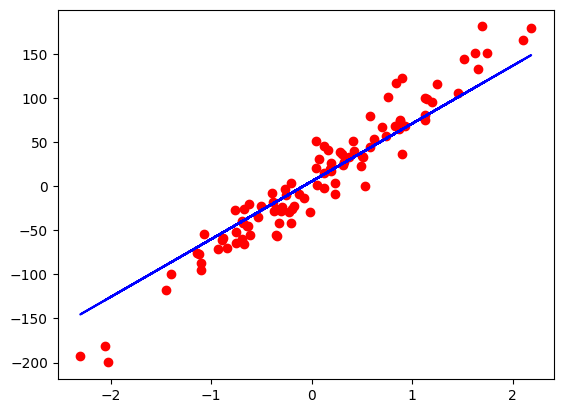

In [ ]:
from numpy.random.mtrand import random

# prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0],1)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer

learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# training loops
niters = 100
for epoch in range(niters):
  # foraward pass and loss
  y_pred = model(X)

  loss = criterion(y_pred, Y)

  # backward pass

  loss.backward()

  # update
  optimizer.step()

  # empty gradients
  optimizer.zero_grad()

  if epoch%10 == 0:
    print(f'epoch: {epoch+1}: loss = {loss.item():.4f}')

# plot 
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


In [ ]:
#0. prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) #reshapes tensor
y_test = y_test.view(y_test.shape[0], 1)


# 1: designing model

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = LogisticRegression(n_features)

# 2: Loss and Optimization

linear_rate = 0.01
criterion = nn.BCELoss()#Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3: training loop
num_epochs = 100

for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward
  loss.backward()

  # update weights
  optimizer.step()

  # empty gradients
  optimizer.zero_grad()

  if epoch%10 == 0:
    print(f'Epoch{epoch+1}: loss = {loss.item() :.4f}, ')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')

569 30
Epoch1: loss = 0.7198, 
Epoch11: loss = 0.5604, 
Epoch21: loss = 0.4645, 
Epoch31: loss = 0.4029, 
Epoch41: loss = 0.3600, 
Epoch51: loss = 0.3281, 
Epoch61: loss = 0.3034, 
Epoch71: loss = 0.2835, 
Epoch81: loss = 0.2670, 
Epoch91: loss = 0.2531, 
accuracy = 0.8860


Dataloading and Datatransform


In [ ]:
# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''

# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__


class WineDataset(Dataset):

    def __init__(self):
      # data loading
      xy = np.loadtxt('./data/wine/wine.csv', delimiter = ',', dtype = np.float32, skiprows=1)
      self.x = torch.from_numpy(xy[ 0, 1:])
      self.y = torch.from_numpy(xy[ :, [0]]) #n_samples, 1
      self.n_samples = xy.shape[0]

    def __getitem__(self, index):
      # dataset[0]
      return x.self[index], y.self[index]

    def __len__(self):
      # len(dataset)
      return self.n_samples

dataset = WineDataset()
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 2)

dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)

# training
num_epochs = 2
total_samples = len
n_iterations = math.ceil(total_samples/4)

for epoch in range(num_epochs):
  for i, (inputs,labels) in enumerate(dataloader):
    # forward, backward, update weights
    if (i+1) % 5 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_iterations}, inputs{inputs.shape}')

FileNotFoundError: ignored

In [ ]:
class WineDataset(Dataset):

    def __init__(self, transform = None):
      # data loading
      xy = np.loadtxt('./data/wine/wine.csv', delimiter = ',', dtype = np.float32, skiprows=1)
      self.x = xy[ 0, 1:]
      self.y = xy[ :, [0]]
      self.n_samples = xy.shape[0]

      self.transform = transform

    def __getitem__(self, index):
      # dataset[0]
      sample =  x.self[index], y.self[index]

      if self.transform:
        sample = self.transform(sample)

      return sample

    def __len__(self):
      # len(dataset)
      return self.n_samples

class ToTensor():

  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MultTransform():

  def __init__(self, factor):
    self.factor = factor
    
  def __call__(self, sample):
    inputs, targets = sample
    inputs *= self.factor
    return inputs, targets

dataset = WineDataset(transorm = ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features))

composed = torchvision.transforms.Compose([ToTensor(), MultTransform(2)])
dataset = WineDataset(transform = composed)

SOFTMAX AND CROSSENTROPY

In [ ]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1.0, 1.0])
print(softmax(x))

x = torch.tensor([2.0, 1.0, 1.0])
print(torch.softmax(x, dim = 0))


[0.57611688 0.21194156 0.21194156]
tensor([0.5761, 0.2119, 0.2119])


In [ ]:
def crossentropy(predicted, actual):
  loss = - np.mean((actual)*np.log(predicted))
  return loss

Y = [1, 0, 0] #one hot encoder of class 0
Y_hat1 = [0.7, 0.1, 0.2]
Y_hat2 = [0.2, 0.4, 0.4]

print(crossentropy(Y_hat1, Y))
print(crossentropy(Y_hat2, Y))

0.11889164797957748
0.5364793041447001


In [ ]:
#softmax already impplemented in this, we do not need another layer
# y_pred : raw, no softmax and y: not one hot encoded, put correct class labels
loss = nn.CrossEntropyLoss()
Y = torch.tensor([0])
# nsamples X nclasses = 1 X 3
Y_hat_good = torch.tensor([[2.0, 0.6, 0.3]])
Y_hat_bad = torch.tensor([[0.6, 2.4, 2.3]])

l1 = loss(Y_hat_good, Y)
l2 = loss(Y_hat_bad, Y)

print(f'Cross Entrop loss 1: {l1.item():.5f}')
print(f'Cross Entropy loss 2: {l2.item():.5f}')

_,predictions1 = torch.max(Y_hat_good, 1)
_,predictions2 = torch.max(Y_hat_bad, 1)

Cross Entrop loss 1: 0.35717
Cross Entropy loss 2: 2.52761


ACTIVATION FUNCTIONS
Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.
Leaky ReLU functions used to tackle vanishing gradient in ReLU. if we lose grad, during backpropagation, weights of that region do not update and hence these neurons die.
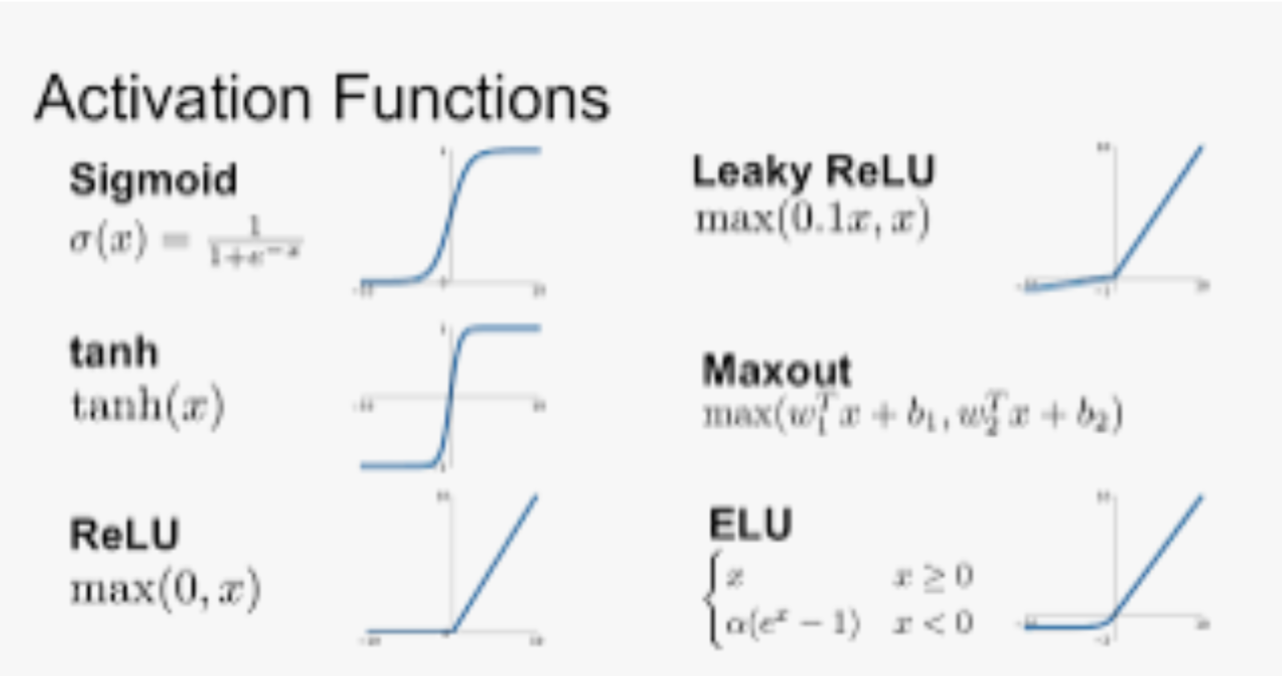

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNetwork, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out



In [ ]:
# option 2:

class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNetwork, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.Linear2 = nn.Linear(hidden_size, 1)
  
  def forward(self, x):
    out = torch.ReLU(self.linear1(x))
    out = torch.Sigmoid(self.linear2(out))
    return out

FEED FORWARD NEURAL NET
A feedforward neural network is a type of artificial neural network in which nodes’ connections do not form a loop.

Often referred to as a multi-layered network of neurons, feedforward neural networks are so named because all information flows in a forward manner only.

The data enters the input nodes, travels through the hidden layers, and eventually exits the output nodes. The network is devoid of links that would allow the information exiting the output node to be sent back into the network.

The purpose of feedforward neural networks is to approximate functions.

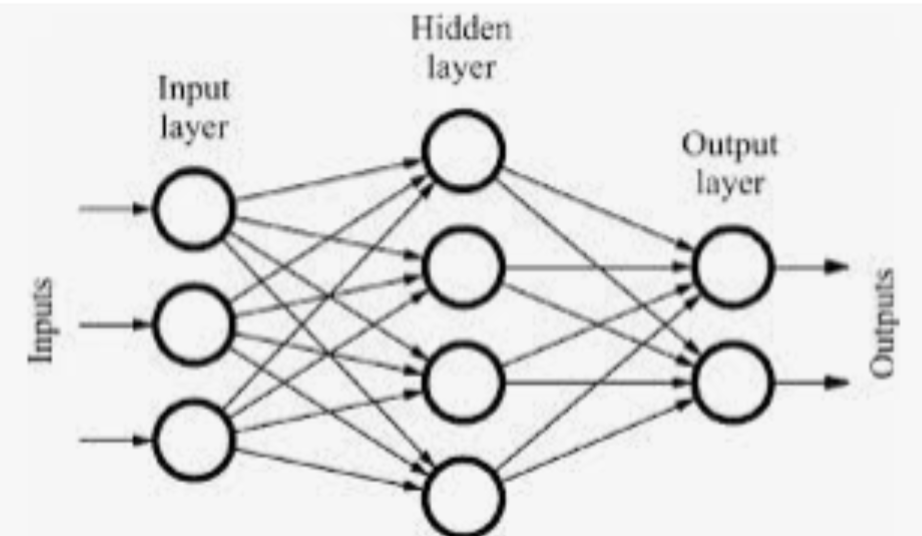

torch.Size([100, 1, 28, 28]) torch.Size([100])


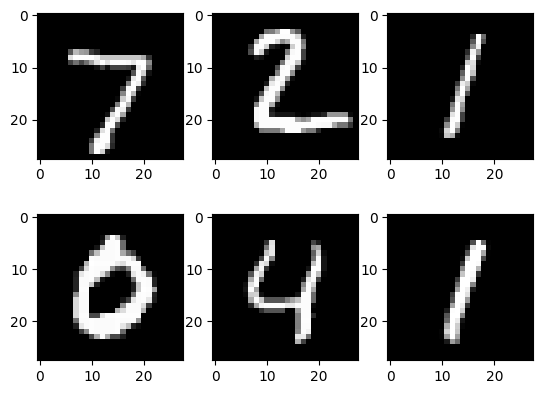

Epoch 1/2, step 100/600, loss = 0.2699
Epoch 1/2, step 200/600, loss = 0.1768
Epoch 1/2, step 300/600, loss = 0.2209
Epoch 1/2, step 400/600, loss = 0.3007
Epoch 1/2, step 500/600, loss = 0.2022
Epoch 1/2, step 600/600, loss = 0.2207
Epoch 2/2, step 100/600, loss = 0.0409
Epoch 2/2, step 200/600, loss = 0.0987
Epoch 2/2, step 300/600, loss = 0.2041
Epoch 2/2, step 400/600, loss = 0.2066
Epoch 2/2, step 500/600, loss = 0.1839
Epoch 2/2, step 600/600, loss = 0.2648
Accuracy = 95.89


In [ ]:
# device config 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 784 #28X28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.01

train_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

examples = iter(test_loader)
for images, labels in examples:
    break
print(images.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(images[i][0], cmap = 'gray')
plt.show()

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28 -> 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward pass
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if(i+1)%100 ==0 :
      print(f'Epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# testing
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  
  acc = 100 * n_correct / n_samples
  print(f'Accuracy = {acc}')

CONVOLUTIONAL NEURAL NETWORK
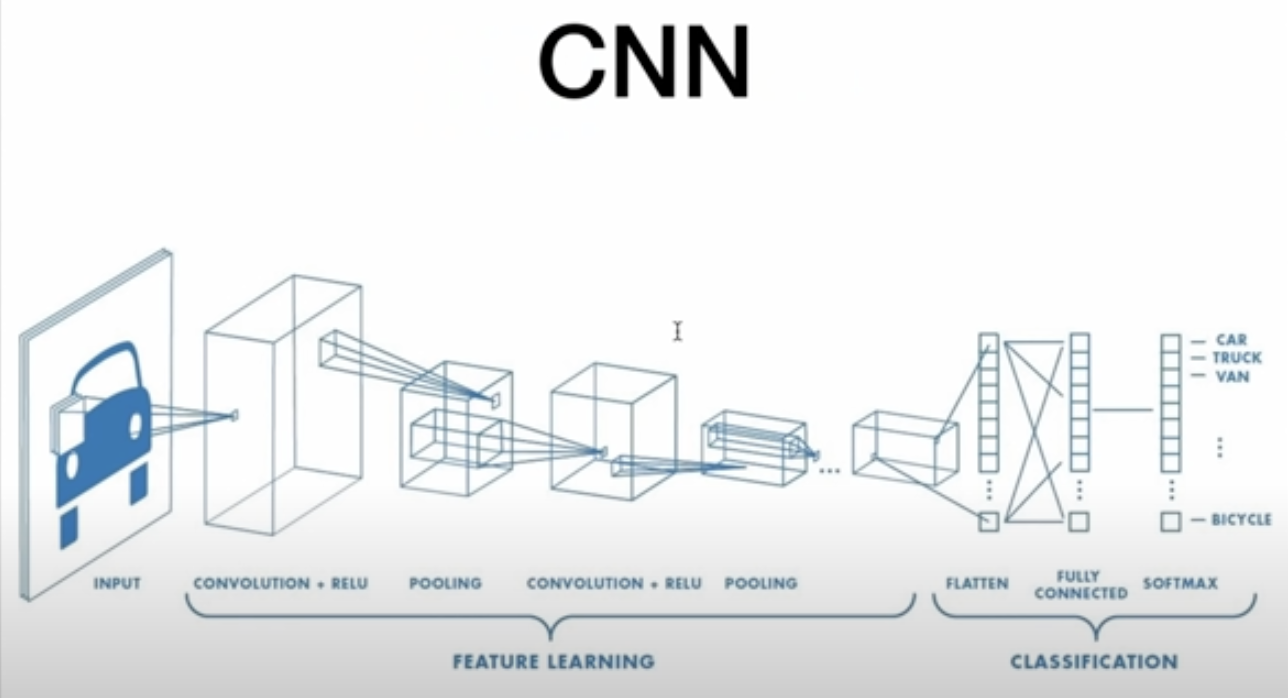

Files already downloaded and verified


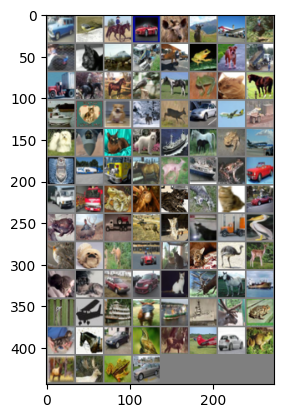

Epoch 1/5, Step 1/500, loss = 2.2989
Epoch 2/5, Step 1/500, loss = 2.2917
Epoch 3/5, Step 1/500, loss = 2.1149
Epoch 4/5, Step 1/500, loss = 2.0242
Epoch 5/5, Step 1/500, loss = 1.8492
Finished Training
Accuracy of the model = 38.12
Accuracy of class plane = 56.7
Accuracy of class car = 41.0
Accuracy of class bird = 15.5
Accuracy of class cat = 21.6
Accuracy of class deer = 15.9
Accuracy of class dog = 44.7
Accuracy of class frog = 49.5
Accuracy of class horse = 43.4
Accuracy of class ship = 43.4
Accuracy of class truck = 49.5


In [ ]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# hyper parameters
batch_size = 100
num_classes = 10
num_epochs = 5
learning_rate = 0.01

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, transform = transform)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x
  
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
      # origin shape: [4, 3, 32, 32] = 4, 3, 1024
      # input_layer: 3 input channels, 6 output channels, 5 kernel size
      images = images.to(device)
      labels = labels.to(device)

      # forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # backward and optimise
      loss.backward()
      optimizer.step()
      optimizer.zero_grad() #empty gradients

      if i % 2000 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

print("Finished Training")

# testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]

    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()

      for i in range(batch_size):
        label = labels[i]
        pred = predicted[i]
        if label==pred:
          n_class_correct[label] += 1
        n_class_samples[label] += 1

acc = 100 * n_correct / n_samples
print(f'Accuracy of the model = {acc}')

for i in range(10):
  acc = 100 * n_class_correct[i]/n_class_samples[i]
  print(f'Accuracy of class {classes[i]} = {acc}')


TRANSFER LEARNING
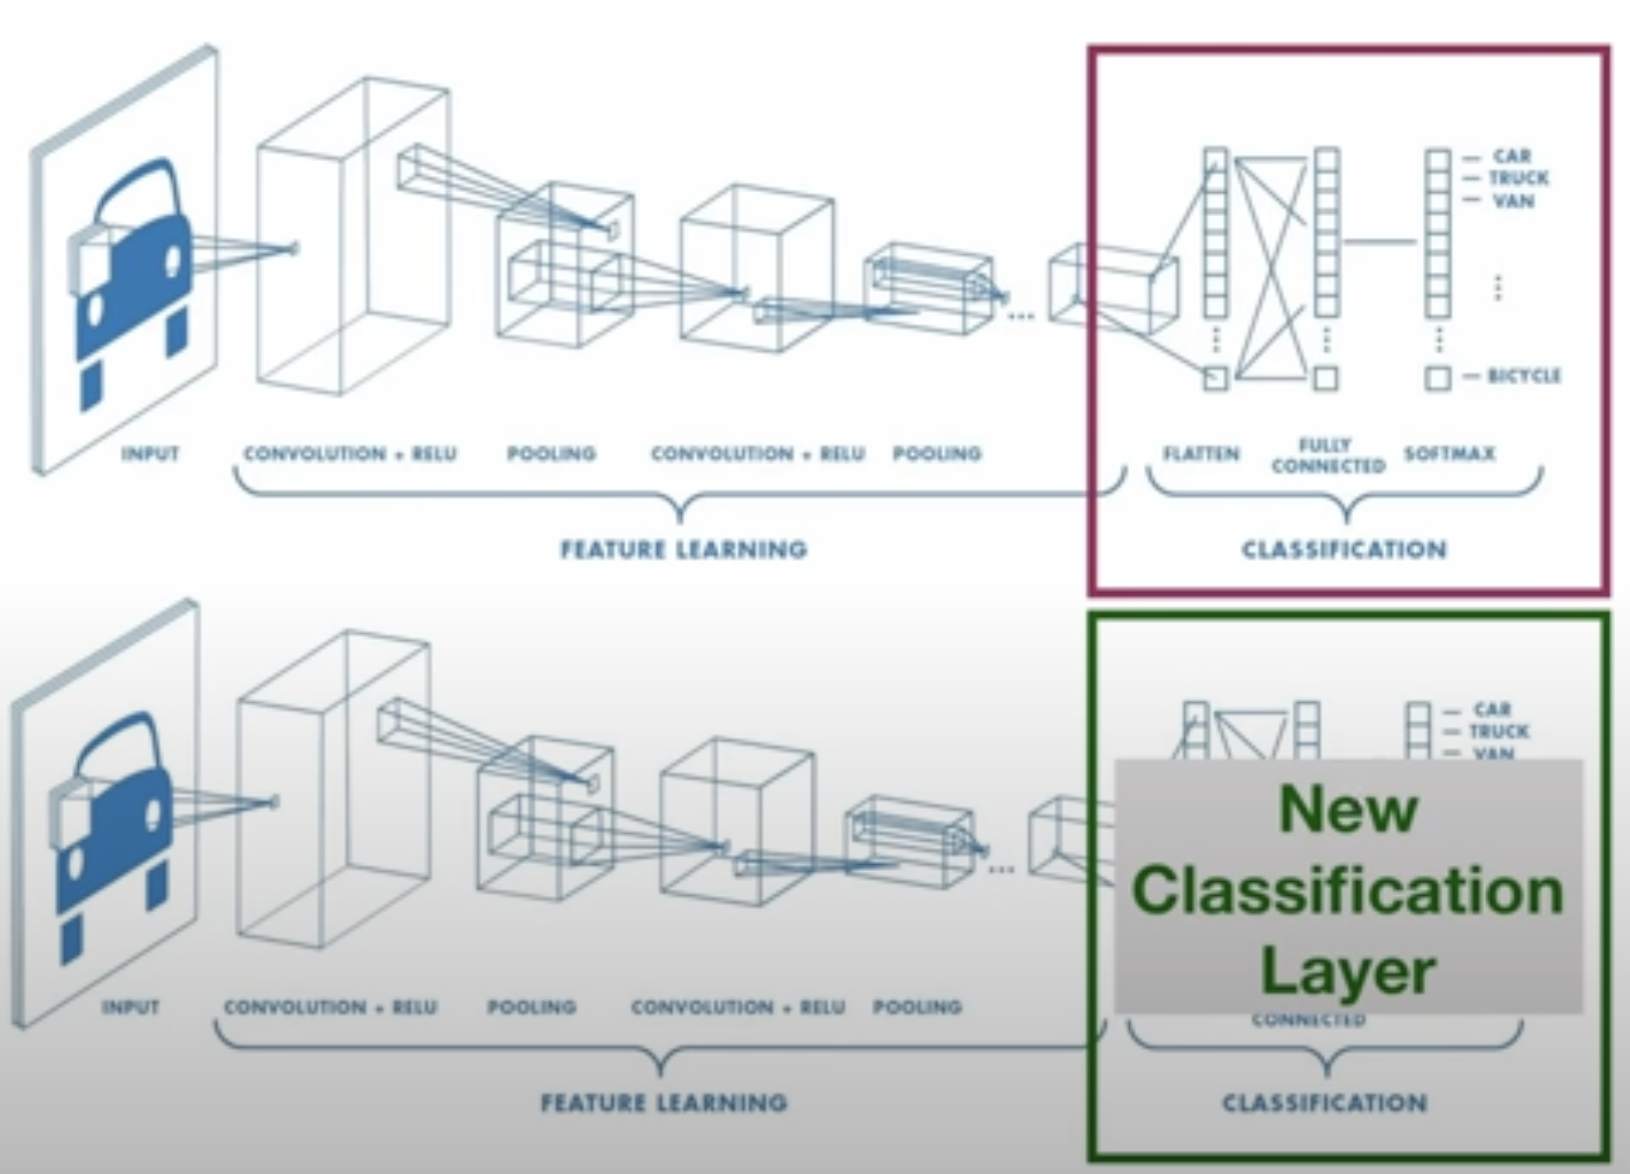

In [ ]:

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

FileNotFoundError: ignored